##Importing the dependencies




In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Importing the datasets

In [2]:
data = pd.read_csv('hypertension_dataset.csv')

In [3]:
data.isnull().sum()

,0
Age,0
Salt_Intake,0
Stress_Score,0
BP_History,0
Sleep_Duration,0
BMI,0
Medication,799
Family_History,0
Exercise_Level,0
Smoking_Status,0


In [4]:
data['Medication'].isnull().sum()

np.int64(799)

In [5]:
data['Medication'].value_counts()

,count
Medication,
Beta Blocker,412
ACE Inhibitor,323
Diuretic,245
Other,206


In [6]:
data['Medication'] = data['Medication'].fillna('No Medication')

In [7]:
data.isnull().sum()

,0
Age,0
Salt_Intake,0
Stress_Score,0
BP_History,0
Sleep_Duration,0
BMI,0
Medication,0
Family_History,0
Exercise_Level,0
Smoking_Status,0


In [8]:
data.head()

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
0,69,8.0,9,Normal,6.4,25.8,No Medication,Yes,Low,Non-Smoker,Yes
1,32,11.7,10,Normal,5.4,23.4,No Medication,No,Low,Non-Smoker,No
2,78,9.5,3,Normal,7.1,18.7,No Medication,No,Moderate,Non-Smoker,No
3,38,10.0,10,Hypertension,4.2,22.1,ACE Inhibitor,No,Low,Non-Smoker,Yes
4,41,9.8,1,Prehypertension,5.8,16.2,Other,No,Moderate,Non-Smoker,No


In [9]:
data['Medication'].dtype

dtype('O')

##Encoding the Objects in the data

In [10]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for i in data.columns:
  if data[i].dtype == 'O':
    data[i] = encoder.fit_transform(data[i])

In [11]:
data

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
0,69,8.0,9,1,6.4,25.8,3,1,1,0,1
1,32,11.7,10,1,5.4,23.4,3,0,1,0,0
2,78,9.5,3,1,7.1,18.7,3,0,2,0,0
3,38,10.0,10,0,4.2,22.1,0,0,1,0,1
4,41,9.8,1,2,5.8,16.2,4,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1980,56,10.2,0,1,6.5,25.0,2,1,1,0,1
1981,29,8.9,4,0,6.9,16.9,3,1,0,0,1
1982,64,5.9,9,1,5.6,18.9,0,1,2,0,1
1983,35,7.4,8,2,8.2,29.2,3,1,2,0,0


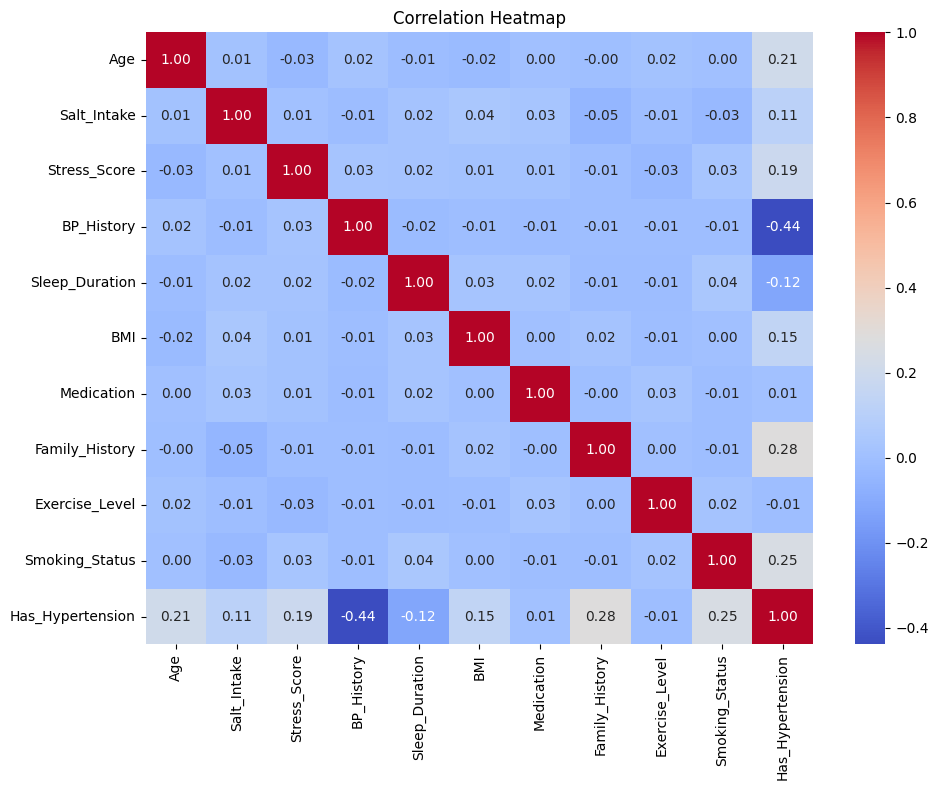

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

##Splitting the data

In [13]:
X = data.drop(columns=['Has_Hypertension'])
Y = data['Has_Hypertension']

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

##Neural Network

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_test, Y_test))


Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5223 - loss: 1.8522 - val_accuracy: 0.5668 - val_loss: 0.7197
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5723 - loss: 0.7025 - val_accuracy: 0.6574 - val_loss: 0.6089
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6519 - loss: 0.6170 - val_accuracy: 0.7380 - val_loss: 0.5661
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7183 - loss: 0.5532 - val_accuracy: 0.6574 - val_loss: 0.6095
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7388 - loss: 0.5314 - val_accuracy: 0.7834 - val_loss: 0.5118
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7757 - loss: 0.4960 - val_accuracy: 0.8010 - val_loss: 0.4905
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7852 - loss: 0.4801 - val_accuracy: 0.7809 - val_loss: 0.4746
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7934 - loss: 0.4698 - val_accuracy: 0.8035 - val_loss:

In [23]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {accuracy:.4f}")


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7713 - loss: 0.4368
Test Accuracy: 0.7960


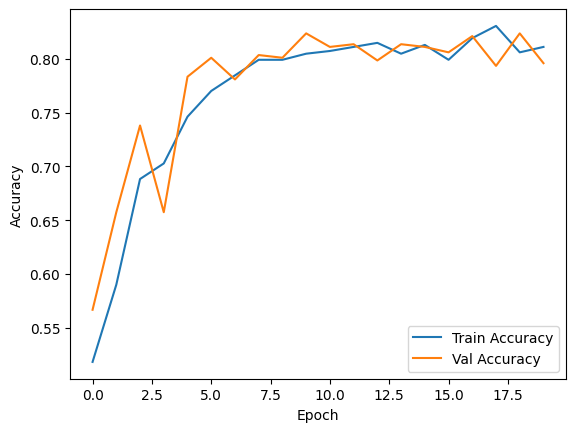

In [24]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
